<a href="https://colab.research.google.com/github/anidhyabhatnagar/sttp1/blob/gradient_descent/Understanding_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

Gradient Descent is a machine learning algorithm that operates iteratively to find the optimal values for its parameters. It takes into account, user-defined learning rate, and initial parameter values.

In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to *coefficients* in Linear Regression and *weights* in neural networks.

# Why Gradient Descent?

*   One of the most critical parts of any machine learning algorithm is optimization. 

*   It enables your learning algorithm to learn faster. 

*   Gradient descent is one of the most powerful optimization algorithm used in machine learning.

Some of you have been familiar with what gradient descent is but when it comes to understanding it, all of us have gone through the process of seeing scary mathematical equations and plots.

Like following mathematical equation: 

Repeat until convergence {

> $ \theta_1 \leftarrow \theta_1 - \alpha \frac {\delta}{\delta \theta_1} \big( \frac {1}{2m} \sum^m_{i=1} \big(h \big(x_i) - y_i)^2) $

> $ \theta_2 \leftarrow \theta_2 - \alpha \frac {\delta}{\delta \theta_2} \big( \frac {1}{2m} \sum^m_{i=1} \big(h \big(x_i) - y_i)^2) $

}

and following plot:



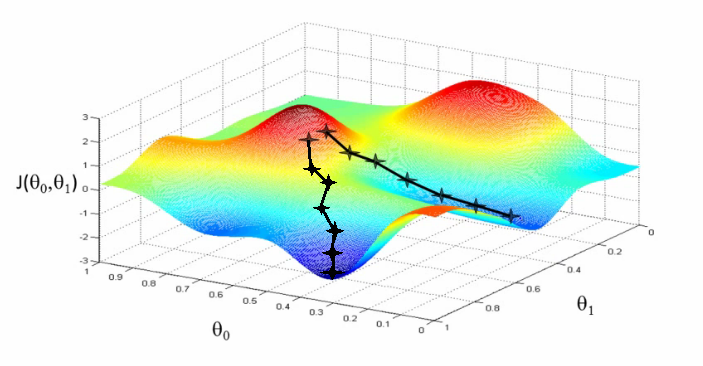

## <b><font color="teal">*Don't worry! It is much easier than it looks like in the equation or the plot.*</font></b>

# Understanding Gradient Descent Simple Way

Let us take an example of a river originating from a Glacier in Himayalayas and flowing out to plains.

### What does the river trying to achieve?

> It's trying to reach the bottom of the mountain by following different paths.

In Machine Learning this is what your model is trying to do, however, for river the gravitational force pulls it wheareas there is no such automatic force in Machine Learning.

Let's walk through some terminologies.

## Global Minima

When the river reaches the bottom of the hill, in Machine Learning terms we can say it has achieved *Global Minima*.

## Local Minima

When the river is flowing down the hill, it may come across some pits and fails to move downwards and in Machine Learning terms, this is called as Local Minima. 

> Local Minima is always harmful for any of the Machine Learning Algorithms. It restricts the Algorithms to converge further.

## Initial Values
Depending upon where the river originates, it will take the different path to reach the bottom of the hill. The Initial Values in your Machine Learning algorithm guides which path is to be taken.

## Gradient
To move downwards from the hill, mathematically your algorithm nee to know *Gradient*. Gradient will give the direction of the slope.

## Learning Rate
The river flows at a certain speed and is pulled by gravitional force, but in machine learning you define at what speed it will converge.

> The Initial Values and the Learning Rate determines whether you reach the Globla Minima (bottom of the hill) or you get trapped in a pit (Local Minima).

Now let's look at the farmula of Gradient Descent:

> $ \theta_{n+1} = \theta_n - \alpha \frac {\delta}{\delta \theta_n} J \big( \theta_n) $

where,

>> $ \theta_n $ is old position.

>> $ \theta_{n+1} $ is new position.

>> $ \alpha $ is the learnining rate.

>> $ J \big ( \theta_n ) $ is the gradient function $ J $ for $ \theta_n $.


## Step Size
To move downwards or to converge you need to take certain number of steps to reach the global minima. Hence, the number of times you will repeat and get the new $ \theta_{n+1} $ is called your step size.





---



# Linear Regression Example

Now let's see gradient descent in Action. Here we will create our own class for Linear Regression. This is to demonstrate and make you understand how the Cost Function and Gradient Descent works.

*   To minimize MSE (Mean Squared Error) we use Gradient Descent to calculate the gradient of our cost function. 

*   Gradient descent consists of looking at the error that our weight currently gives us, using the derivative of the cost function to find the gradient (The slope of the cost function using our current weight), and then changing our weight to move in the direction opposite of the gradient. 

*   We need to move in the opposite direction of the gradient since the gradient points up the slope instead of down it, so we move in the opposite direction to try to decrease our error.

First lets create our Linear Regression class named MyLinearRegression

In [ ]:
class MyLinearRegression:
    def __init__(self, weight=0, bias=0.0, learning_rate=0.001,
                 iterations=4000):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    # Method to predict the values
    def predict(self, xfeature):
        predicted_set = []
        for i in range(len(xfeature)):
            predicted_value = self.weight * xfeature[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    # Implementing Cost Function
    def cost_function(self, xfeature, yfeature):
        count = len(xfeature)
        total_error = 0.0
        for i in range(count):
            total_error += (yfeature[i] - (self.weight * xfeature[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    # Implementing Gradient Descent
    def update_weights(self, xfeature, yfeature):
        weight_deriv = 0
        bias_deriv = 0
        count = len(xfeature)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * xfeature[i] * (yfeature[i] - ((self.weight * xfeature[i]) + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (yfeature[i] - ((self.weight * xfeature[i]) + self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    # Method to train the model and updating the weights
    def train(self, xfeature, yfeature):
        for i in range(self.iterations):
            self.update_weights(xfeature, yfeature)
            # Calculating cost
            self.cost = self.cost_function(xfeature, yfeature)
            self.cost_trend.append(self.cost)
            if i % 10000 == 0:
                print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".
                      format(i, self.weight, self.bias, self.cost))


Now we will use the above class and implement the Linear Regression. 

Iteration: 0	 Weight: [954.7974]	 Bias: [152.006]	 Cost: 2801305471.35255
Iteration: 10000	 Weight: [9501.40554101]	 Bias: [25445.53799597]	 Cost: 15648465.6390949
Iteration: 20000	 Weight: [9450.70992087]	 Bias: [25787.16232466]	 Cost: 15635478.604503928
Iteration: 30000	 Weight: [9449.97318596]	 Bias: [25792.12698568]	 Cost: 15635475.861719865
[9449.96247941]
[25792.19913425]


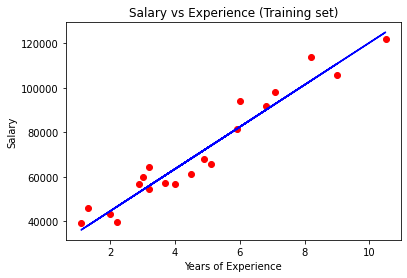

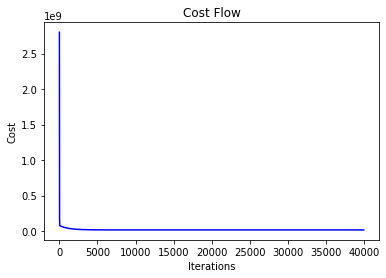

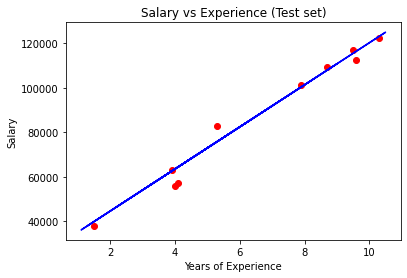

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split

# Importing the dataset
master = "https://raw.githubusercontent.com/anidhyabhatnagar/machine_learning/master/datasets/salary_data.csv"
req = requests.get(master)
text_data = req.text
records = text_data.split('\n')[1:-1]
string_data = [record.split(',') for record in records]
data = list(np.float_(string_data))
dataset = pd.DataFrame(data, columns=['YearsExperience', 'Salary'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,
                                                    random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression(weight=0, bias=0.0, learning_rate=0.001, iterations=40000)
regressor.train(X, y)
print(regressor.weight)
print(regressor.bias)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.plot(regressor.cost_trend, color='blue')
plt.title('Cost Flow')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Linear Regression using Scikit-learn



[9345.94244312]
26816.192244031183


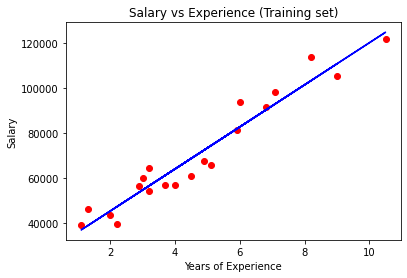

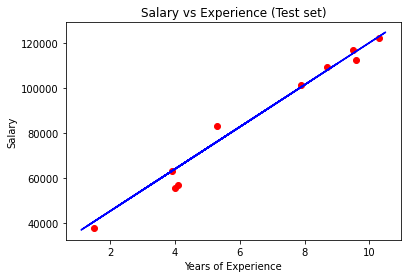

In [52]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the dataset
master = "https://raw.githubusercontent.com/anidhyabhatnagar/machine_learning/master/datasets/salary_data.csv"
req = requests.get(master)
text_data = req.text
records = text_data.split('\n')[1:-1]
string_data = [record.split(',') for record in records]
data = list(np.float_(string_data))
dataset = pd.DataFrame(data, columns=['YearsExperience', 'Salary'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,
                                                    random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()